# Exercise: Bringing it together

Let's try a single, longer example that (tries to) bring in the things we've learnt so far.

Let's say you have travelled to the past with a high-quality telescope, and are observing the moons of Jupiter for the first time in human history. You find 80 of them!

You measure several properties of the orbits of these moons around Jupiter. You store these values in a text file called "jupiters_moons.csv".

Now, before you announce your discovery to the world, you decide to calculate the distribution statistics of the moons. You want to use these statistics to understand the astrophysics underlying these moons.

Your first step to this analysis is inputting the data. To do this, you use the NumPy module:

In [1]:
import numpy as np

Now, look up the documentation for Numpy's `loadtxt()` function — you can do so by typing

    np.loadtxt?

or

    help(np.loadtxt)
    

Once you've done that, use loadtxt() to read the "jupiters_moons.csv" file in the [GitHub repository](https://github.com/nden/astropy_bg_2023) into a variable called `moons_data`.

**Hint:** *csv* stands for a comma separated ASCII text file, so you need to tell loadtxt() that the values are separated by ",".

In [2]:
!wget --no-check-certificate 'https://raw.githubusercontent.com/nden/astropy_bg_2023/main/Modules/jupiters_moons.csv'

--2023-11-20 23:20:57--  https://raw.githubusercontent.com/nden/astropy_bg_2023/main/Modules/jupiters_moons.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9583 (9.4K) [text/plain]
Saving to: ‘jupiters_moons.csv’

jupiters_moons.csv  100%[===================>]   9.36K  --.-KB/s    in 0s      

2023-11-20 23:20:57 (49.1 MB/s) - ‘jupiters_moons.csv’ saved [9583/9583]



In [4]:
moons_data = np.loadtxt('jupiters_moons.csv', delimiter=',')

ValueError: ignored

Running the above should get you an error. This is because the file you are loading contains numbers and strings (e.g. 'Planet'), but np.loadtxt() cannot turn the strings into floats. Make sure to look at the "dtype" option in the documentation, and try setting it to string — this will turn all things into strings, but we can extract the numbers easily later.

In [5]:
# Set the loadtxt() "dtype" option to string
moons_data = np.loadtxt('jupiters_moons.csv', delimiter=',', dtype='str')

You can also skip reading the first row of the file using the option "skiprows". This row contains names of columns rather than data, so you can ignore it.

In [6]:
moons_data = np.loadtxt('jupiters_moons.csv', delimiter=',', dtype='str', skiprows=1)

Now print this data

In [7]:
moons_data

array([['Jupiter', 'Io', '501', ..., '64.5', '0', '1'],
       ['Jupiter', 'Europa', '502', ..., '64.5', '0', '1'],
       ['Jupiter', 'Ganymede', '503', ..., '64.6', '0.1', '1'],
       ...,
       ['Jupiter', 'S2003_j16', '55506', ..., '', '', '2'],
       ['Jupiter', 'S2003_j23', '55507', ..., '', '', '2'],
       ['Jupiter', 'S2003_j24', '55508', ..., '', '', '2']], dtype='<U13')

Take a closer look at the printed array. Notice how there are outer brackets surrounding a bunch of bracketed lists?

You get a NumPy n-dimensional array object. Yesterday, you saw that these "ndarrays" can be powerful tools. We will look into it further here.

In the cell below, index the array for it's 0th element and see what happens:

In [8]:
moons_data[0]

array(['Jupiter', 'Io', '501', 'JUP365', 'Laplace', '2000-01-01.5',
       '421800', '0.004', '49.1', '330.9', '0', '0', '1.762732', '1.333',
       '0', '268.1', '64.5', '0', '1'], dtype='<U13')

You should see the orbital parameters of the Jupiter moon, "Io". What happens if you index *that* mini-array for it's 6th element? Do that below:

In [9]:
moons_data[0][6]

'421800'

You should get Io's semi-major axis (a) as a string.

If you look at the contents of the file, you will see that different columns have different orbital parameters of the 80 moons. The 6th column contains the semi-major axes (a) of the orbits (remember that indexing starts from 0 in Python). You can access this column as follows:

In [10]:
moons_data[:, 6]

array(['421800', '671100', '1070400', '1882700', '181400', '221900',
       '129000', '128000', '11440600', '11712300', '23468200', '23683900',
       '11700800', '23144400', '21034500', '11146400', '23795500',
       '7398500', '23644600', '23108000', '22930500', '20892100',
       '23302600', '21066700', '23032900', '22981300', '20935400',
       '23792500', '20978000', '21108500', '23064400', '22899000',
       '20827000', '19265800', '20901000', '23543300', '23052600',
       '22846700', '23348700', '20821000', '23778200', '20976000',
       '23097800', '23021800', '20915700', '17042300', '23067400',
       '23654700', '24205200', '23150500', '23189800', '20793000',
       '12260300', '20802600', '20336300', '22909200', '23055800',
       '22604600', '23744800', '20768600', '23156400', '18694200',
       '22953200', '20941000', '11481000', '23206200', '23245300',
       '20964800', '22849500', '21768700', '11401000', '23124500',
       '20997700', '22926500', '23199400', '23576300'

The above tells the array that you want all rows but only the 6th column.

We see that the values are all strings because we loaded everything using the string data type. We can extract the numbers by converting the strings to floats as follows

In [11]:
major_axes = moons_data[:, 6]
# The following is the numpy equivalent of typecasting
major_axes = major_axes.astype(float)

The above shows one advantage of using "ndarrays" as opposed to lists. For typecasting lists, you have to individually convert each value either manually or by using a for loop; you can try doing this yourself by converting `moons_data[:, 6]` to a list `list(moons_data[:, 6])`.

Using the code in the previous cell, read columns 7 (eccentricities) and 10 (inclination) into variables "eccts" and "incls" respectively and convert the strings to floats

In [12]:
eccts = moons_data[:, 7]
eccts = eccts.astype(float)

incls = moons_data[:, 10]
incls = incls.astype(float)

Now, to perform statistical analysis on this data, the first thing we need to do is calculate the averages. Later on, we'll see that there are external functions you can import into Python that will just do this for you, but for now let's calculate it manually (it's easy enough, right?).

Above, we saw use of the sum() function - as it turns out, you can run the sum() function on a list or an ndarray (so long as it only contains numbers) and it will tell you the sum. There is also a NumPy equivalent of the sum function called `np.sum()`, which works faster for ndarrays.

The only other thing you'll need to calculate the average is the len() function, which returns the number of elements in a list/array. Using those two, calculate averages below:

In [13]:
average_major_axis = np.sum(major_axes)/len(major_axes)
average_ecct = np.sum(eccts)/len(eccts)
average_incl = np.sum(incls)/len(incls)

Now let's print these quantities in a *fancy* way

In [14]:
print(f'The average orbital semi-major axis of the moons is {average_major_axis}')
# Using ":.5f", you can print 5 digits after the decimal place
print(f'The average orbital eccentricity of the moons is {average_ecct:.5f}')
# Using ":.3f", you can print 3 digits after the decimal place
print(f'The average orbital inclinations of the moons is {average_incl:.3f}')

The average orbital semi-major axis of the moons is 18974958.75
The average orbital eccentricity of the moons is 0.23605
The average orbital inclinations of the moons is 123.980


Okay, so the other thing statisticians are always interested in is the standard deviation from the mean - this basically tells how dispersed the values in a sample are. The formula for a standard deviation is
$$
s = \sqrt{\frac{\sum_{1}^{N}(x_i - \mu)^2}{N-1}}
$$

where $\mu$ is the average and N is the total number of values.

We already know how to get N, and we know what $\mu$ is as well. So to calculate this, we need to know how to calculate the quantity on the top of the fraction. This is actually kind of tricky without the use of Numpy arrays. See the example below for elucidation:

In [15]:
print(major_axes - 1)

[  421799.   671099.  1070399.  1882699.   181399.   221899.   128999.
   127999. 11440599. 11712299. 23468199. 23683899. 11700799. 23144399.
 21034499. 11146399. 23795499.  7398499. 23644599. 23107999. 22930499.
 20892099. 23302599. 21066699. 23032899. 22981299. 20935399. 23792499.
 20977999. 21108499. 23064399. 22898999. 20826999. 19265799. 20900999.
 23543299. 23052599. 22846699. 23348699. 20820999. 23778199. 20975999.
 23097799. 23021799. 20915699. 17042299. 23067399. 23654699. 24205199.
 23150499. 23189799. 20792999. 12260299. 20802599. 20336299. 22909199.
 23055799. 22604599. 23744799. 20768599. 23156399. 18694199. 22953199.
 20940999. 11480999. 23206199. 23245299. 20964799. 22849499. 21768699.
 11400999. 23124499. 20997699. 22926499. 23199399. 23576299. 20963099.
 20882599. 23829299. 22887399.]


Okay, so you can subtract an integer from an ndarray. What if we try the list version?

In [17]:
print(list(major_axes) - 1)

TypeError: ignored

You can't directly subtract an integer from a list. But why is this subtraction important?

Your spidey senses should be tingling for how we can leverage the subtraction functionality of ndarrays to calculate our standard deviation. In the cell below, fill in the variable `top_frac_major_axis` to calculate the following quantity:
$$
\sum_{i=1}^N (x_i - \mu)^2
$$

Notice here that you don't have to actually calculate it one by one - if we first compute a single array that represents each semi-major axis with the mean subtracted off and then that value squared, then we finish off "top_frac_major_axes" just by summing up that array as we've done before.

In [18]:
top_frac_major_axis = np.sum((major_axes - average_major_axis)**2)

With that done, we can easily apply the formula to get the final STD.

**Hint:** the function np.sqrt() will be useful here.

In [19]:
std_major_axis = np.sqrt(top_frac_major_axis/len(major_axes))

Now compare this result with that obtained by applying `np.std` directly.

In [20]:
np.std(major_axes)

7111707.588260602

In [21]:
std_ecct = np.std(eccts)
std_incl = np.std(incls)

Alright! If you've done everything correctly, you should have found the averages and standard deviations.

Let's, for fun, make a helpful plot to visualize the data and the calculated statistics.

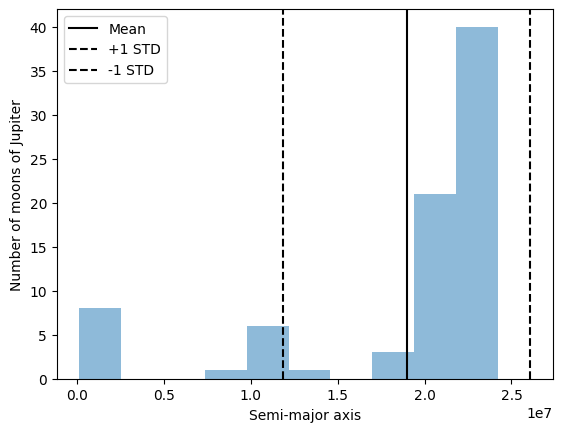

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(major_axes, alpha=0.5)
plt.axvline(average_major_axis, color='k', label="Mean")
plt.axvline(average_major_axis + std_major_axis, ls='--', color='k', label="+1 STD")
plt.axvline(average_major_axis - std_major_axis, ls='--', color='k', label="-1 STD")
plt.xlabel('Semi-major axis')
plt.ylabel('Number of moons of Jupiter')
plt.legend()

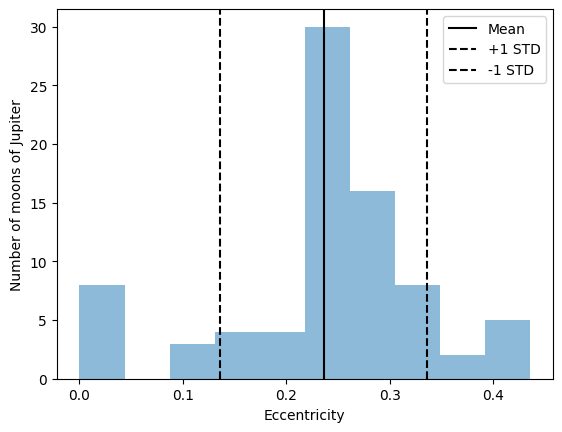

In [23]:
plt.hist(eccts, alpha=0.5)
plt.axvline(average_ecct, color='k', label="Mean")
plt.axvline(average_ecct + std_ecct, ls='--', color='k', label="+1 STD")
plt.axvline(average_ecct - std_ecct, ls='--', color='k', label="-1 STD")
plt.xlabel('Eccentricity')
plt.ylabel('Number of moons of Jupiter')
plt.legend()

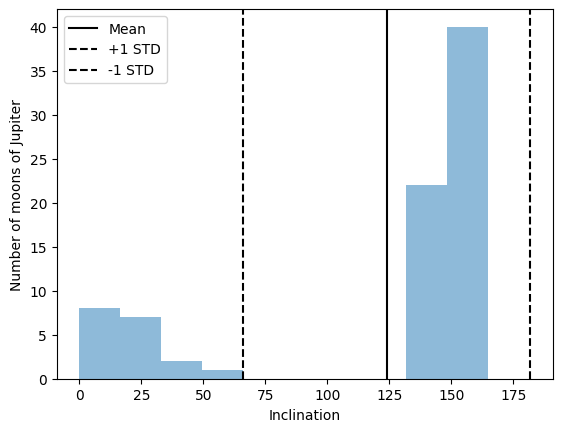

In [24]:
plt.hist(incls, alpha=0.5)
plt.axvline(average_incl, color='k', label="Mean")
plt.axvline(average_incl + std_incl, ls='--', color='k', label="+1 STD")
plt.axvline(average_incl - std_incl, ls='--', color='k', label="-1 STD")
plt.xlabel('Inclination')
plt.ylabel('Number of moons of Jupiter')
plt.legend()

Nice! It looks like our formula for standard deviation successfully describes the distribution of orbital semi-major axes, eccentricities, and inclinations pretty well. Now, let's interpret the plots -- why do you see [multi-modalties](https://en.wikipedia.org/wiki/Multimodal_distribution) in the histograms?

It is easy to understand this by visualizing the orbital distribution of the moons around jupiter.

**Note**: We provide most of the code required for this visualization, because fully understanding it (right now) is beyond the scope of this tutorial.

You will need three different modules: `matplotlib` for plotting (which you used above) and animation, `astropy` for defining units and time, and `poliastro` for obtaining the orbits.

`poliastro` is not directly available in Google Colab (unlike NumPy and Matplotlib), so you will need to install it as follows

In [25]:
!pip install poliastro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.7/162.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 38.9 MB/s eta 0:00:00


Now load all the required modules

In [26]:
from astropy import units as u
from astropy.time import Time

from poliastro.twobody import Orbit
from poliastro.bodies import Sun, Jupiter

As an example, let's start by visualizing the orbit of Mars around the Sun.

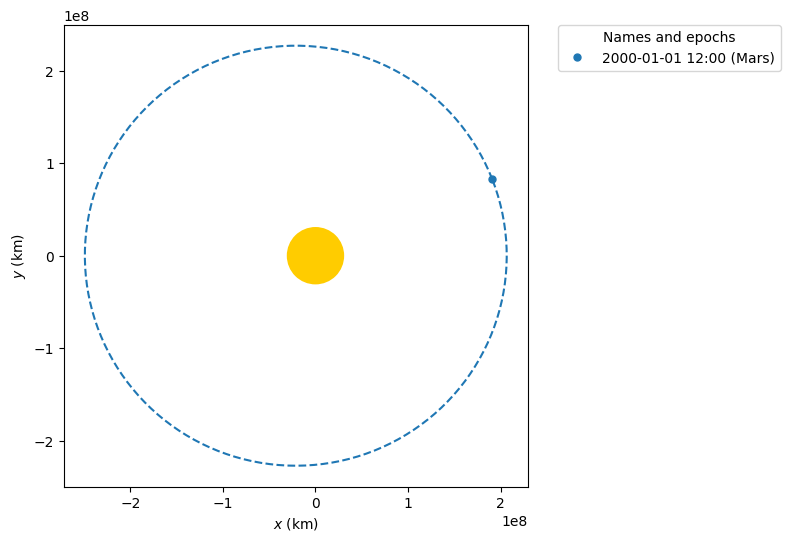

In [27]:
# Data for Mars at J2000 from JPL HORIZONS
a = 1.523679 * u.AU
ecc = 0.093315 * u.one
inc = 1.85 * u.deg
raan = 49.562 * u.deg
argp = 286.537 * u.deg
nu = 23.33 * u.deg

orb = Orbit.from_classical(Sun, a, ecc, inc, raan, argp, nu)
orb.plot(label='Mars')

Now that we can plot orbits, let's vizualize the orbits of the **Galilean moons** of Jupiter, using the following code.

**Fun fact:** Io is the fourth-largest moon in the Solar System, only slightly larger than our (Earth's) moon.

In [28]:
GALILEAN_MOONS = ['Io', 'Europa', 'Ganymede', 'Callisto']

In [29]:
# The following code is for illustration purposes only!
# Do not worry if you don't understand it.
from poliastro.plotting import OrbitPlotter2D

op = OrbitPlotter2D()

for moon_name in GALILEAN_MOONS:
    # Find galilean moons in the array
    moon_ind = np.where(moons_data[:, 1] == moon_name)
    moon = moons_data[moon_ind][0]

    # Set the orbital parameters with units
    a = float(moon[6]) * u.km
    ecc = float(moon[7]) * u.one
    inc = float(moon[10]) * u.deg
    # Not as important for this exercise
    raan = float(moon[8]) * u.deg
    argp = float(moon[11]) * u.deg
    nu = (float(moon[9]) - 180) * u.deg

    # Define the orbit using above parameters
    orb = Orbit.from_classical(Jupiter, a, ecc, inc, raan, argp, nu)
    # Plot the orbit
    op.plot(orb, label=f'{moon_name}')

# Display the orbits
op.show()

The label for the orbits shows some sort of a time-stamp or an "epoch". Let's see if such an epoch is available in the "jupiters_moons.csv" file.

In [30]:
moons_data[:, 5]

array(['2000-01-01.5', '2000-01-01.5', '2000-01-01.5', '2000-01-01.5',
       '2000-01-01.5', '2000-01-01.5', '2000-01-01.5', '2000-01-01.5',
       '2000-01-01.5', '2000-01-01.5', '2000-01-01.5', '2000-01-01.5',
       '2000-01-01.5', '2000-01-01.5', '2000-01-01.5', '2000-01-01.5',
       '2000-01-01.5', '2000-01-01.5', '2000-01-01.5', '2000-01-01.5',
       '2000-01-01.5', '2000-01-01.5', '2000-01-01.5', '2000-01-01.5',
       '2000-01-01.5', '2000-01-01.5', '2000-01-01.5', '2000-01-01.5',
       '2000-01-01.5', '2000-01-01.5', '2000-01-01.5', '2000-01-01.5',
       '2000-01-01.5', '2000-01-01.5', '2000-01-01.5', '2000-01-01.5',
       '2000-01-01.5', '2000-01-01.5', '2000-01-01.5', '2000-01-01.5',
       '2000-01-01.5', '2000-01-01.5', '2000-01-01.5', '2000-01-01.5',
       '2000-01-01.5', '2000-01-01.5', '2000-01-01.5', '2000-01-01.5',
       '2000-01-01.5', '2000-01-01.5', '2000-01-01.5', '2000-01-01.5',
       '2000-01-01.5', '2000-01-01.5', '2000-01-01.5', '2000-01-01.5',
      

Now use this epoch when you define the orbit.

In [31]:
epoch = Time("2000-01-01T12:00:00", scale='tdb')

In [32]:
# The following code is for illustration purposes only!
# Do not worry if you don't understand it.
from poliastro.plotting import OrbitPlotter3D

op = OrbitPlotter3D()

for moon_name in GALILEAN_MOONS:
    moon_ind = np.where(moons_data[:, 1] == moon_name)
    moon = moons_data[moon_ind][0]

    a = float(moon[6]) * u.km
    ecc = float(moon[7]) * u.one
    inc = float(moon[10]) * u.deg
    raan = float(moon[8]) * u.deg
    argp = float(moon[11]) * u.deg
    nu = (float(moon[9]) - 180) * u.deg

    orb = Orbit.from_classical(Jupiter, a, ecc, inc, raan, argp, nu, epoch=epoch)
    op.plot(orb, label=f'{moon_name}')

op.show()

Great, that works! The orbits look circular with low inclination.


Now, let's investigate further and plot the orbits of all 80 moons of Jupiter. The following plots a static image of the orbits instead of an animated one because it's hard to visualize 80 animations together.

In [33]:
# The following code is for illustration purposes only!
# Do not worry if you don't understand it.
from poliastro.plotting import OrbitPlotter3D

op = OrbitPlotter3D()

for moon in moons_data:
    # Set the orbital parameters with units
    a = float(moon[6]) * u.km
    ecc = float(moon[7]) * u.one
    inc = float(moon[10]) * u.deg
    # Not as important for this exercise
    raan = float(moon[8]) * u.deg
    argp = float(moon[11]) * u.deg
    nu = (float(moon[9]) - 180) * u.deg

    # Define the orbit using above parameters
    orb = Orbit.from_classical(Jupiter, a, ecc, inc, raan, argp, nu, epoch=epoch)
    # Plot the orbit
    op.plot(orb, label=f'{moon[1]}')

# Display the orbits
op.show()

Output hidden; open in https://colab.research.google.com to view.

The orbits of the Galilean moons are highlighted in the above figure, but it is hard to see their structure. This is because the figure is dominated by the **irregular satellites** (or moons) that have highly eccentric orbits at large distances from Jupiter. The inclinations of these orbits are also generally high and have wide distributions.

If you scroll back to the semi-major axis, eccentricity, and inclination histograms of all the moons of Jupiter, you will see that the irregular satellites represent the peaks at high values. Thus, this class of moons forms one of the peaks in the multi-modal distributions. The other peaks are formed by the **regular satellites** that include the **inner satellites** and the Galilean moons (or the main group).

The regular satellites have nearly circular orbits with low inclination (similar to the Io orbit we just plotted). They are larger (in size) and more massive than the irregular satellites and orbit closer to Jupiter. They are all **prograde** moons, i.e., they orbit in the same direction as the rotation of Jupiter.

Let's rerun the above code, but this time only focus on regular satellites (```
moons_data[:8] ```)

In [34]:
# The following code is for illustration purposes only!
# Do not worry if you don't understand it.
from poliastro.plotting import OrbitPlotter3D

op = OrbitPlotter3D()

for moon in moons_data[:8]:
    # Set the orbital parameters with units
    a = float(moon[6]) * u.km
    ecc = float(moon[7]) * u.one
    inc = float(moon[10]) * u.deg
    # Not as important for this exercise
    raan = float(moon[8]) * u.deg
    argp = float(moon[11]) * u.deg
    nu = (float(moon[9]) - 180) * u.deg

    # Define the orbit using above parameters
    orb = Orbit.from_classical(Jupiter, a, ecc, inc, raan, argp, nu, epoch=epoch)
    # Plot the orbit
    op.plot(orb, label=f'{moon[1]} orbit')

# Display the orbits
op.show()

Here you see the regular satellites: the 4 inner satellites and the 4 Galilean moons. Note that the two innermost satellite orbits are almost identical and are thus seen as only one orbit. This figure demonstrates the properties we mentioned above.

The conclusion of your analysis is that there are two main types of Jupiter moons: regular and irregular. Now, you should have your astrophysics researcher hat on:

***

#### Q - Are the differences between the two types of Jupiter moons due to some underlying differences in the formation of these moons?

***

Ans. Here

Hint: Refer to the references in this [wikipedia section](https://en.wikipedia.org/wiki/Moons_of_Jupiter#Origin_and_evolution).

# Another exercise:

Can you design an object to store the moons data we have been working with?